In [2]:
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from itertools import combinations
from IPython.display import clear_output

In [3]:
pick_data = pd.read_csv("pick_data_upload_2.csv")

/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_51352/3130211619.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  pick_data = pd.read_csv("pick_data_upload_2.csv")


In [4]:
pick_data

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time,flag_6,flag_7
0,7,AKL,48,20188105006,2,4,St,2018-01-16 03:05:21,0,0
1,10,HRL,48,20188197426,1,24,St,2018-01-30 10:52:31,0,0
2,10,HRL,48,20188197426,1,24,St,2018-01-30 10:58:08,0,0
3,10,HRL,48,20188197426,1,12,St,2018-01-30 12:03:18,0,0
4,10,HRL,48,20188197426,1,24,St,2018-01-30 12:06:39,0,0
...,...,...,...,...,...,...,...,...,...,...
10118249,Z97984,SHL,48,20202687649,1,2,St,2020-03-18 01:24:24,0,0
10118250,Z97984,SHL,48,20202872645,6,1,St,2020-04-22 23:28:20,0,0
10118251,Z97984,SHL,48,20202983837,5,1,St,2020-05-12 22:58:52,0,0
10118252,Z97984,SHL,48,20201001119,4,1,St,2020-05-14 17:48:22,0,0


In [5]:
pick_data = pick_data[(pick_data['flag_6'] == 0) & (pick_data['flag_6'] == 0)]

In [6]:
pick_data["product_id"] = pick_data["product_id"].astype(str)
pick_data["category"] = pick_data["category"].astype(str)
pick_data["source_order_id"] = pick_data["source_order_id"].astype(str)
pick_data["order_number"] = pick_data["order_number"].astype(str)
pick_data["position_in_order"] = pick_data["position_in_order"].astype(int)
pick_data["pick_volume"] = pick_data["pick_volume"].astype(int)
pick_data["quantity_unit"] = pick_data["quantity_unit"].astype(str)
pick_data["date_time"] = pd.to_datetime(pick_data["date_time"])

/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_51352/3645244070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pick_data["product_id"] = pick_data["product_id"].astype(str)
/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_51352/3645244070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pick_data["category"] = pick_data["category"].astype(str)
/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_51352/3645244070.py:4: SettingWithCopyWarning: 
A value is trying to be set o

In [7]:
product_data=pd.read_csv("002 product_data.csv",header=None,encoding='latin-1')

In [8]:
product_data.columns=["product_id","product_description","product_group"]

In [9]:


merged_df = pd.merge(pick_data, product_data, on='product_id', how='left')

print(merged_df)

merged_df.to_csv('merged_data.csv', index=False)


         product_id category source_order_id order_number  position_in_order  \
0                 7      AKL              48  20188105006                  2   
1                10      HRL              48  20188197426                  1   
2                10      HRL              48  20188197426                  1   
3                10      HRL              48  20188197426                  1   
4                10      HRL              48  20188197426                  1   
...             ...      ...             ...          ...                ...   
10112683     Z97984      SHL              48  20202687649                  1   
10112684     Z97984      SHL              48  20202872645                  6   
10112685     Z97984      SHL              48  20202983837                  5   
10112686     Z97984      SHL              48  20201001119                  4   
10112687     Z97984      SHL              48  20203127974                  7   

          pick_volume quantity_unit    

In [12]:
df=merged_df

df['month_year'] = df['date_time'].dt.to_period('M').dt.to_timestamp()

df['date_time'] = pd.to_datetime(df['date_time'])

df['year'] = df['date_time'].dt.year

data_by_year = {}

for year in df['year'].unique():
    data_by_year[year] = df[df['year'] == year]

print(data_by_year[2018])

         product_id category source_order_id order_number  position_in_order  \
0                 7      AKL              48  20188105006                  2   
1                10      HRL              48  20188197426                  1   
2                10      HRL              48  20188197426                  1   
3                10      HRL              48  20188197426                  1   
4                10      HRL              48  20188197426                  1   
...             ...      ...             ...          ...                ...   
10112257     Z97980      SHL              48  20188853768                  1   
10112258     Z97980      SHL              48  20188900807                  1   
10112259     Z97980      SHL              48  20188930270                  1   
10112260     Z97980      SHL              48  20189006218                  1   
10112261     Z97980      SHL              48  20189079094                  1   

          pick_volume quantity_unit    

  month_year                  product_group  order_count
0 2018-01-01              16_Sonderverkäufe          638
1 2018-01-01      18_Haustechnik_Hausgeräte         3061
2 2018-01-01                    19_Werkzeug         8191
3 2018-01-01                   20_C-Artikel         1605
4 2018-01-01  31_Install.-Befestigungs-Mat.        34301


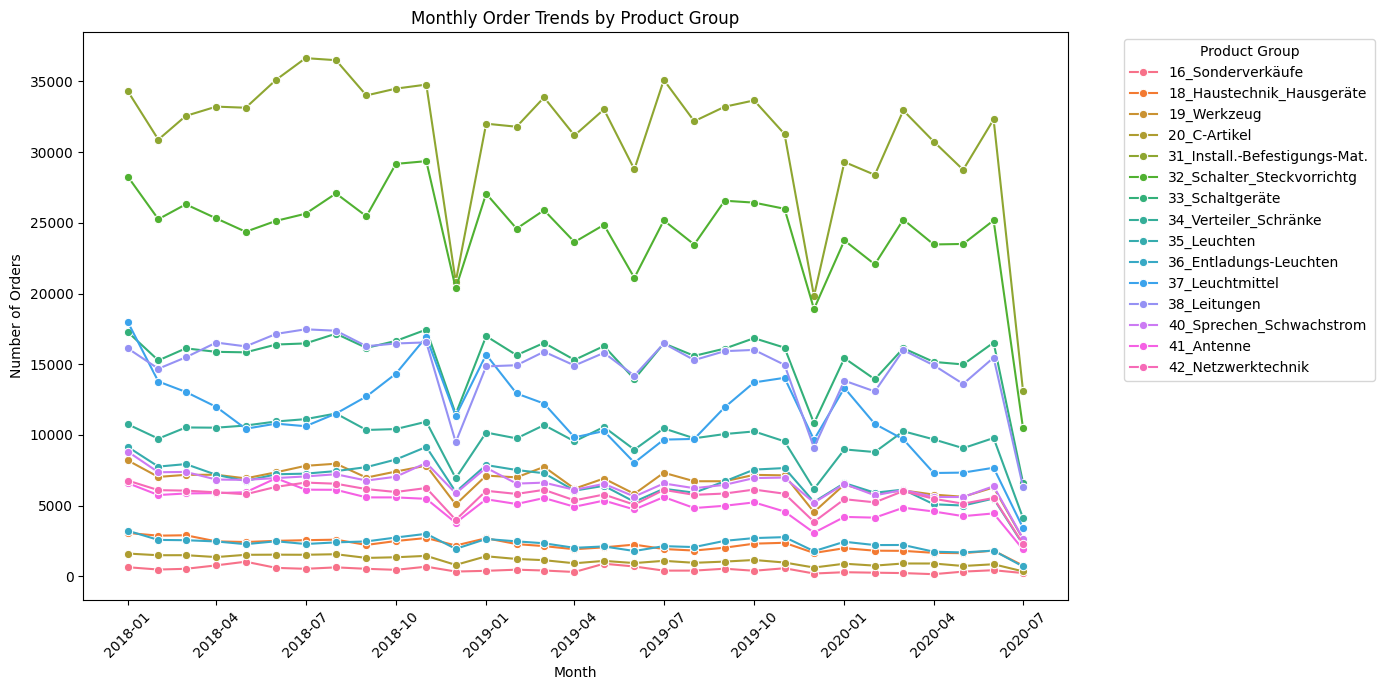

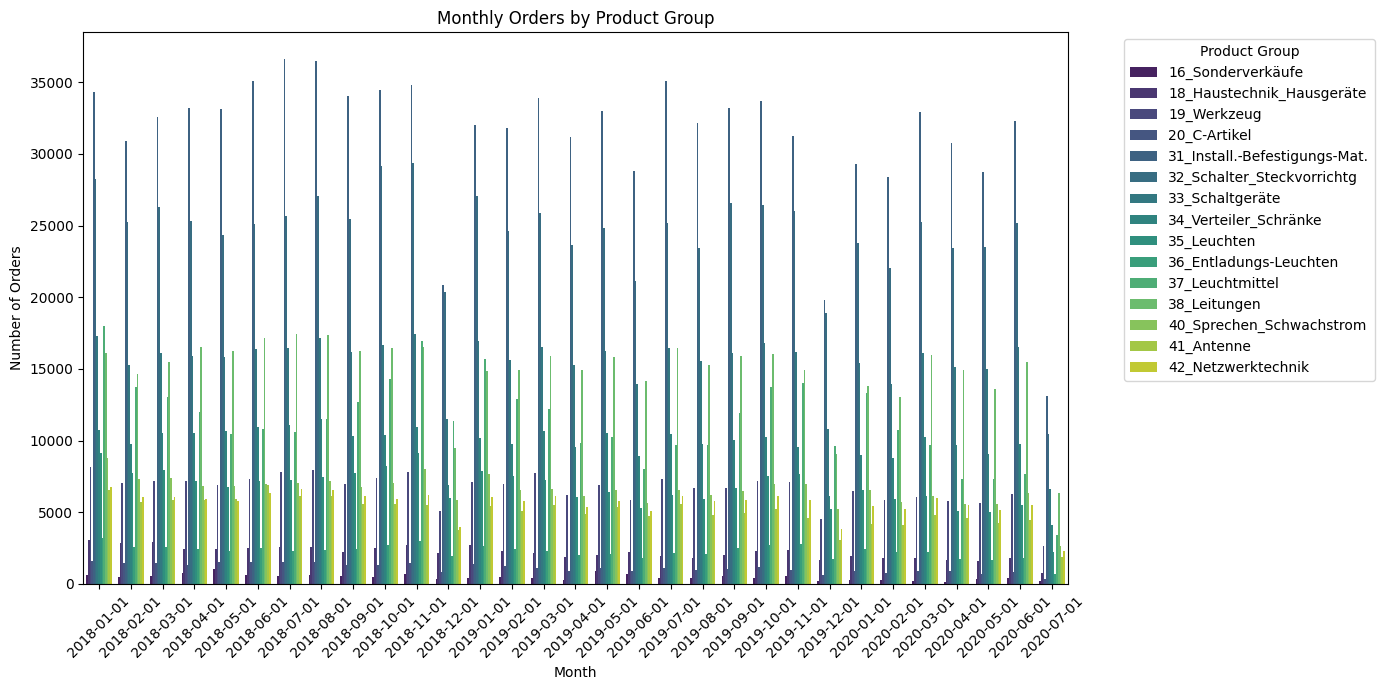

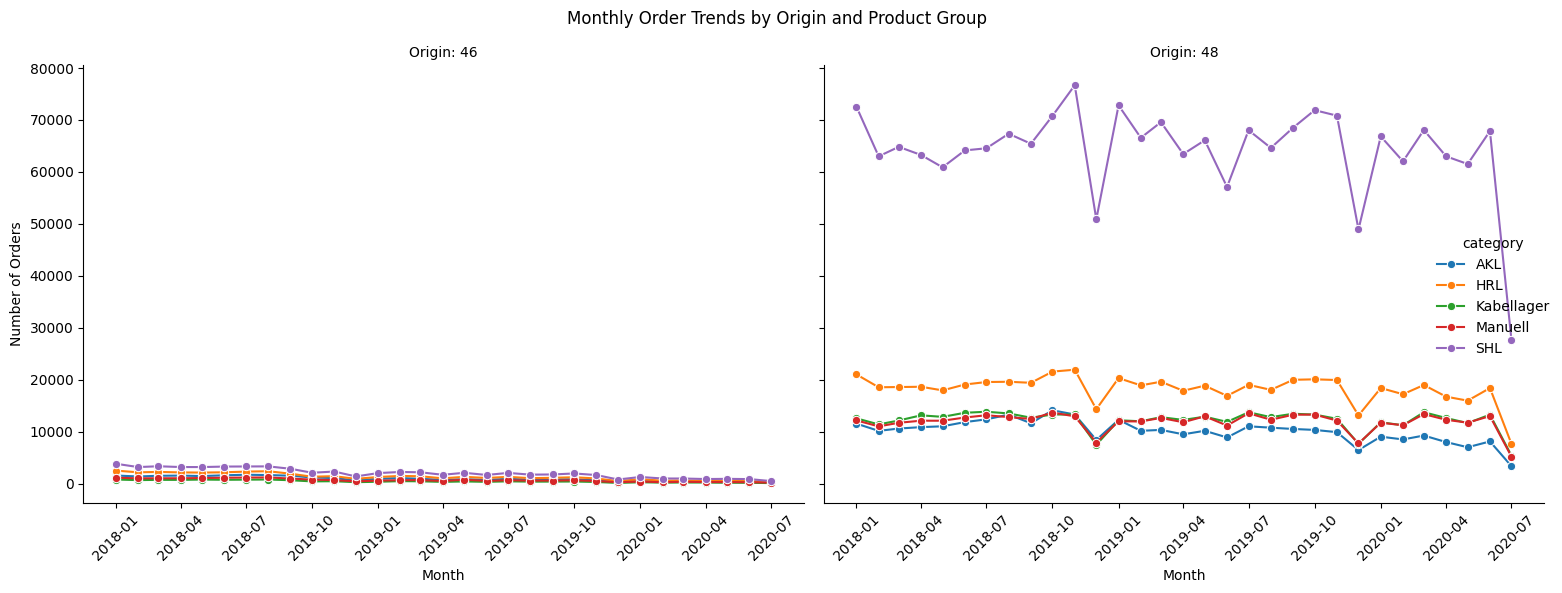

In [14]:
orders_by_product_group = df.groupby(['month_year', 'product_group'])['order_number'].nunique().reset_index()
orders_by_product_group.rename(columns={'order_number': 'order_count'}, inplace=True)

print(orders_by_product_group.head())


plt.figure(figsize=(14, 7))
sns.lineplot(
    data=orders_by_product_group,
    x='month_year',
    y='order_count',
    hue='product_group',
    marker='o'
)
plt.title('Monthly Order Trends by Product Group')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.legend(title='Product Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(
    data=orders_by_product_group,
    x='month_year',
    y='order_count',
    hue='product_group',
    palette='viridis'
)
plt.title('Monthly Orders by Product Group')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.legend(title='Product Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



orders_origin_product = df.groupby(['month_year', 'source_order_id', 'category'])['order_number'].nunique().reset_index()
orders_origin_product.rename(columns={'order_number': 'order_count'}, inplace=True)


g = sns.FacetGrid(
    orders_origin_product,
    col='source_order_id',
    hue='category',
    height=6,
    aspect=1.2,
    palette='tab10'
)

g.map(sns.lineplot, 'month_year', 'order_count', marker='o').add_legend()

g.set_titles('Origin: {col_name}')
g.set_axis_labels('Month', 'Number of Orders')

for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.subplots_adjust(top=0.85)
g.fig.suptitle('Monthly Order Trends by Origin and Product Group')
plt.tight_layout()
plt.show()

In [10]:
correlation_matrix

product_group,16_Sonderverkäufe,18_Haustechnik_Hausgeräte,19_Werkzeug,20_C-Artikel,31_Install.-Befestigungs-Mat.,32_Schalter_Steckvorrichtg,33_Schaltgeräte,34_Verteiler_Schränke,35_Leuchten,36_Entladungs-Leuchten,37_Leuchtmittel,38_Leitungen,40_Sprechen_Schwachstrom,41_Antenne,42_Netzwerktechnik
product_group,,,,,,,,,,,,,,,
16_Sonderverkäufe,1.000000,-0.072037,-0.057868,0.155677,0.104370,0.058361,-0.046476,0.140286,-0.081596,0.037721,-0.098008,0.041382,-0.044049,0.031233,-0.035791
18_Haustechnik_Hausgeräte,-0.072037,1.000000,0.445037,0.212320,0.526516,0.564347,0.659314,0.521284,0.635447,0.698067,0.737626,0.463572,0.747778,0.431617,0.315499
19_Werkzeug,-0.057868,0.445037,1.000000,0.014550,0.630533,0.649100,0.570198,0.552472,0.697015,0.652371,0.590147,0.680729,0.525061,0.635110,0.553193
20_C-Artikel,0.155677,0.212320,0.014550,1.000000,0.227963,0.195842,0.301227,0.096933,0.120671,0.221478,0.207523,0.257574,0.224320,0.232720,0.060913
31_Install.-Befestigungs-Mat.,0.104370,0.526516,0.630533,0.227963,1.000000,0.765263,0.827358,0.798936,0.601060,0.815700,0.585988,0.913267,0.514161,0.894422,0.691017
32_Schalter_Steckvorrichtg,0.058361,0.564347,0.649100,0.195842,0.765263,1.000000,0.792012,0.727992,0.786774,0.777770,0.684809,0.789214,0.678655,0.662418,0.710453
33_Schaltgeräte,-0.046476,0.659314,0.570198,0.301227,0.827358,0.792012,1.000000,0.716961,0.705591,0.819240,0.697810,0.809027,0.654297,0.761652,0.597960
34_Verteiler_Schränke,0.140286,0.521284,0.552472,0.096933,0.798936,0.727992,0.716961,1.000000,0.657142,0.744857,0.603092,0.744473,0.596552,0.683992,0.561689
35_Leuchten,-0.081596,0.635447,0.697015,0.120671,0.601060,0.786774,0.705591,0.657142,1.000000,0.792828,0.875709,0.605959,0.826985,0.493802,0.508708


In [11]:
weekly_pivot

product_group,16_Sonderverkäufe,18_Haustechnik_Hausgeräte,19_Werkzeug,20_C-Artikel,31_Install.-Befestigungs-Mat.,32_Schalter_Steckvorrichtg,33_Schaltgeräte,34_Verteiler_Schränke,35_Leuchten,36_Entladungs-Leuchten,37_Leuchtmittel,38_Leitungen,40_Sprechen_Schwachstrom,41_Antenne,42_Netzwerktechnik
week,,,,,,,,,,,,,,,
1,8534,826,35807,17173,365422,44970,12705,5067,4955,2282,37027,320155,3756,22643,40734
2,38890,1758,165341,27070,1365967,99101,35791,15249,10901,5879,107893,1300109,7006,99923,122784
3,54239,1829,102641,41465,1472942,120134,38735,14011,12213,6192,114032,1354522,7508,91363,225020
4,305482,2507,100481,127864,1410494,103072,36771,12782,9263,5901,98707,1314436,7383,98725,135086
5,47220,3716,114895,38406,1507245,120175,52002,14022,10054,6635,99574,1349555,8056,97598,149719
6,38407,1951,86039,194008,1437312,116379,43292,14329,10318,5457,92057,1419078,7008,99929,154859
7,20155,2460,90965,30104,1387355,123509,39898,18153,9456,5473,95031,1316670,7309,100946,160522
8,34345,2078,111363,36235,1413961,131144,35740,14074,9612,5882,83939,1246567,6746,95328,205319
9,46342,1996,133518,45464,1482956,124124,42086,18789,11835,5620,89539,1329735,6152,105068,154308
